<a href="https://colab.research.google.com/github/Vicyn666/IncomePredictionRBGroup1/blob/main/Group1_Income_pred_Tasks1%2B2_25feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задачи определения уровня дохода

# Задание 1: логистическая регрессия


## <font color='green'>1. Загрузка данных и их первичный анализ</font>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

--2023-02-23 21:27:21--  https://storage.yandexcloud.net/cloud-certs/CA.pem
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3.5K) [application/x-x509-ca-cert]
Saving to: ‘/root/.postgresql/root.crt’

/root/.postgresql/r 100%[===================>]   3.50K  --.-KB/s    in 0s      

2023-02-23 21:27:22 (718 MB/s) - ‘/root/.postgresql/root.crt’ saved [3579/3579]



In [ ]:
!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fe

In [ ]:
import psycopg2

conn = psycopg2.connect("""
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
    port=6432
    sslmode=verify-full
    dbname=db_clients
    user=mlhs_student
    password=mlhs_student
    target_session_attrs=read-write
""")

In [ ]:
import pandas as pd

query = "SELECT * from adult_income"
data_full = pd.read_sql_query(query, conn)
data = pd.read_sql_query(query, conn)

conn.close()

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
data.shape

(9615, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9615 entries, 0 to 9614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9615 non-null   int64  
 1   workclass        9615 non-null   object 
 2   fnlwgt           9615 non-null   int64  
 3   education        9615 non-null   object 
 4   educational-num  9615 non-null   int64  
 5   marital-status   9615 non-null   object 
 6   occupation       9615 non-null   object 
 7   relationship     9615 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.1+ MB


Удаляем строку с пустым значением поля income

In [ ]:
data=data[data.income.notnull()]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 0 to 9613
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9614 non-null   int64  
 1   workclass        9614 non-null   object 
 2   fnlwgt           9614 non-null   int64  
 3   education        9614 non-null   object 
 4   educational-num  9614 non-null   int64  
 5   marital-status   9614 non-null   object 
 6   occupation       9614 non-null   object 
 7   relationship     9614 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


Проверяем, что пустых значений больше нет

In [ ]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Заменим категориальные признаки в поле income на числовые: 



In [ ]:
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)

Удаляем категориальные признаки

In [ ]:
data = data.drop(['workclass','education','marital-status','occupation','relationship','race','gender','native-country'],axis=1)

In [ ]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0.0,0.0,40.0,0
1,38,89814,9,0.0,0.0,50.0,0
2,28,336951,12,0.0,0.0,40.0,1
3,44,160323,10,7688.0,0.0,40.0,1
4,18,103497,10,0.0,0.0,30.0,0


Проверяем количество каждого из вариантов дохода

In [ ]:
data['income'].value_counts()

0    7356
1    2258
Name: income, dtype: int64

In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,9614.000000,9.614000e+03,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000
mean,38.731329,1.882948e+05,10.080092,1121.998232,87.926669,40.522987,0.234866
std,13.842687,1.051352e+05,2.562733,7890.578253,404.085647,12.416221,0.423937
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.154652e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.778450e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.374175e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000


Строим матрицу корреляции

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.081938,0.006905,0.082360,0.052424,0.081728,0.224250
fnlwgt,-0.081938,1.000000,-0.024398,-0.005989,-0.000409,-0.004686,-0.003089
educational-num,0.006905,-0.024398,1.000000,0.132639,0.083546,0.136237,0.320775
capital-gain,0.082360,-0.005989,0.132639,1.000000,-0.030944,0.098911,0.221998
capital-loss,0.052424,-0.000409,0.083546,-0.030944,1.000000,0.056343,0.139776
hours-per-week,0.081728,-0.004686,0.136237,0.098911,0.056343,1.000000,0.228856
income,0.224250,-0.003089,0.320775,0.221998,0.139776,0.228856,1.000000


Корреляция с признаком fnlwgt крайне слабая, удалим его

In [ ]:
data = data.drop(['fnlwgt'],axis=1)

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.006905,0.082360,0.052424,0.081728,0.224250
educational-num,0.006905,1.000000,0.132639,0.083546,0.136237,0.320775
capital-gain,0.082360,0.132639,1.000000,-0.030944,0.098911,0.221998
capital-loss,0.052424,0.083546,-0.030944,1.000000,0.056343,0.139776
hours-per-week,0.081728,0.136237,0.098911,0.056343,1.000000,0.228856
income,0.224250,0.320775,0.221998,0.139776,0.228856,1.000000


## <font color='green'>2.1. Обучение модели</font>



Сформируем матрицу X объект-признак и вектор y целевой переменной.

In [ ]:
X = data.drop('income', axis=1) # матрица объект-признак
y = data['income'] # целевая переменная

In [ ]:
#X_full = X.copy()

Мы разбиваем данные на train и test, чтобы:
* на тренировочных данных обучить модель
* на тестовых применить обученную модель и затем проверить качество модели

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [ ]:
# import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.436662,-0.032251,-0.145108,-0.221089,-2.160013
1,-1.291984,-0.032251,-0.145108,-0.221089,-0.043911
2,-1.002627,-0.419154,-0.145108,-0.221089,0.769974
3,-0.568591,1.128459,-0.145108,-0.221089,-0.450854
4,-0.423912,1.128459,-0.145108,-0.221089,1.176916


Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [ ]:
# from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # объявление модели
model.fit(Xtrain, ytrain) # обучение модели

LogisticRegression()

In [ ]:
pred_test = model.predict(Xtest) # предсказание классов

In [ ]:
accuracy_score(ytest, pred_test)

0.8157237936772047

In [ ]:
y.value_counts()

0    7356
1    2258
Name: income, dtype: int64

Баланса классов нет: большинство имеют доход менее <=50K (77%)

Посмотрим, что предсказывает модель.

In [ ]:
pred_test[:50]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## <font color='green'>2.2. Валидация модели</font>

Для оценки качества модели используются различные метрики качества. Давайте посмотрим, какие метрики полезно считать в задаче классификации, кроме accuracy.

Для оценки качества моделей бинарной классификации полезно смотреть на **матрицу ошибок** (confusion matrix):

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, pred_test)

array([[1768,   74],
       [ 369,  193]])

In [ ]:
ytest.value_counts()

0    1842
1     562
Name: income, dtype: int64

In [ ]:
from sklearn.metrics import recall_score

recall_score(ytest, pred_test)

0.34341637010676157

In [ ]:
from sklearn.metrics import precision_score

precision_score(ytest, pred_test)

0.7228464419475655

In [ ]:
probs = model.predict_proba(Xtest)

probs[:10]

array([[0.80497975, 0.19502025],
       [0.89080712, 0.10919288],
       [0.68177497, 0.31822503],
       [0.92853628, 0.07146372],
       [0.47648491, 0.52351509],
       [0.61441019, 0.38558981],
       [0.89131205, 0.10868795],
       [0.61550102, 0.38449898],
       [0.77766504, 0.22233496],
       [0.72026733, 0.27973267]])

Модель слишком позитивна. Она присваивает классу 0 (доход <50K USD) всегда большие вероятности.

Попробуем изменить порог для перевода вероятности в классы со стандартного 0.5 на порог поменьше.

In [ ]:
probs_income = probs[:,1]

classes = probs_income > 0.25

In [ ]:
confusion_matrix(ytest, classes)

array([[1488,  354],
       [ 186,  376]])

In [ ]:
recall_score(ytest, classes)

0.6690391459074733

In [ ]:
from sklearn.metrics import precision_score

precision_score(ytest, classes)

0.5150684931506849

При пороге вероятности в 0.25 модель выявит 2/3 (67%) клиентов с доходом свыше 50K USD, но при этом точность составит только порядка 52%.

# Задание 2: дополнительная обработка категориальных признаков в исходных данных

In [ ]:
data_full.dropna(inplace = True)
data_full['income'] = data['income'].replace('<=50K', 0)
data_full['income'] = data['income'].replace('>50K', 1)

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 0 to 9613
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9614 non-null   int64  
 1   workclass        9614 non-null   object 
 2   fnlwgt           9614 non-null   int64  
 3   education        9614 non-null   object 
 4   educational-num  9614 non-null   int64  
 5   marital-status   9614 non-null   object 
 6   occupation       9614 non-null   object 
 7   relationship     9614 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
data_full.groupby(by = ['education', 'educational-num'])['income'].sum().sort_values(ascending = False)

education     educational-num
Bachelors     13                 632
HS-grad       9                  497
Some-college  10                 407
Masters       14                 292
Prof-school   15                 112
Assoc-voc     11                  91
Assoc-acdm    12                  86
Doctorate     16                  74
11th          7                   14
10th          6                   13
7th-8th       4                   12
12th          8                    9
5th-6th       3                    9
9th           5                    8
1st-4th       2                    2
Preschool     1                    0
Name: income, dtype: int64

so we see that education and educational_num have 1-to-1 relation

In [ ]:
#let's make it one column
data_full['education_category'] = data_full.apply(lambda row: f"{row['educational-num']}_{row['education']}".lower() if row['educational-num'] > 9 else f"0{row['educational-num']}_{row['education']}".lower(), axis=1).to_list()

In [ ]:
#checking the result
data_full.groupby(by = ['education_category','education', 'educational-num'])['income'].sum()

education_category  education     educational-num
01_preschool        Preschool     1                    0
02_1st-4th          1st-4th       2                    2
03_5th-6th          5th-6th       3                    9
04_7th-8th          7th-8th       4                   12
05_9th              9th           5                    8
06_10th             10th          6                   13
07_11th             11th          7                   14
08_12th             12th          8                    9
09_hs-grad          HS-grad       9                  497
10_some-college     Some-college  10                 407
11_assoc-voc        Assoc-voc     11                  91
12_assoc-acdm       Assoc-acdm    12                  86
13_bachelors        Bachelors     13                 632
14_masters          Masters       14                 292
15_prof-school      Prof-school   15                 112
16_doctorate        Doctorate     16                  74
Name: income, dtype: int64

In [ ]:
#dropping the original exccesive cols
data_full.drop(['education', 'educational-num'], inplace = True, axis = 1)

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 0 to 9613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 9614 non-null   int64  
 1   workclass           9614 non-null   object 
 2   fnlwgt              9614 non-null   int64  
 3   marital-status      9614 non-null   object 
 4   occupation          9614 non-null   object 
 5   relationship        9614 non-null   object 
 6   race                9614 non-null   object 
 7   gender              9614 non-null   object 
 8   capital-gain        9614 non-null   float64
 9   capital-loss        9614 non-null   float64
 10  hours-per-week      9614 non-null   float64
 11  native-country      9614 non-null   object 
 12  income              9614 non-null   int64  
 13  education_category  9614 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


In [ ]:
#we still observe 7 more object types, let's explore which values it takes
for col in data_full.select_dtypes(include=['object']).columns:
  display(data_full.groupby(by = col).sum()['income'].sort_values(ascending = False))
  print(20*'=')

workclass
Private             1429
Self-emp-not-inc     197
Self-emp-inc         194
Local-gov            172
State-gov            114
Federal-gov          112
?                     39
Without-pay            1
Never-worked           0
Name: income, dtype: int64

marital-status
Married-civ-spouse       1929
Never-married             149
Divorced                  119
Widowed                    24
Separated                  21
Married-spouse-absent      13
Married-AF-spouse           3
Name: income, dtype: int64

occupation
Exec-managerial      558
Prof-specialty       542
Sales                280
Craft-repair         273
Adm-clerical         159
Transport-moving      93
Tech-support          74
Machine-op-inspct     71
Protective-serv       57
?                     39
Farming-fishing       38
Handlers-cleaners     35
Other-service         35
Armed-Forces           2
Priv-house-serv        2
Name: income, dtype: int64

relationship
Husband           1715
Not-in-family      247
Wife               205
Unmarried           57
Own-child           25
Other-relative       9
Name: income, dtype: int64

race
White                 2055
Black                   98
Asian-Pac-Islander      76
Other                   15
Amer-Indian-Eskimo      14
Name: income, dtype: int64

gender
Male      1902
Female     356
Name: income, dtype: int64

native-country
United-States                 2089
?                               43
Philippines                     15
India                           14
England                          9
Canada                           9
Mexico                           8
Greece                           5
Italy                            5
Puerto-Rico                      5
China                            5
Germany                          4
Cuba                             4
Japan                            4
South                            3
Taiwan                           3
Portugal                         3
Poland                           3
Jamaica                          3
Thailand                         2
Ireland                          2
Yugoslavia                       2
Hungary                          2
Columbia                         2
Dominican-Republic               2
Ecuador                          2
El-Salvador                      2
France                           2
Haiti

education_category
13_bachelors       632
09_hs-grad         497
10_some-college    407
14_masters         292
15_prof-school     112
11_assoc-voc        91
12_assoc-acdm       86
16_doctorate        74
07_11th             14
06_10th             13
04_7th-8th          12
03_5th-6th           9
08_12th              9
05_9th               8
02_1st-4th           2
01_preschool         0
Name: income, dtype: int64

In [ ]:
#we see unknown values marked as "?" in native-country, occupation and workclass
#let's explore it a little bit
data_full[(data_full['native-country'] == '?') | (data_full['occupation'] == '?') | (data_full['workclass'] == '?')]

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_category
4,18,?,103497,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,0,10_some-college
6,29,?,227026,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,0,09_hs-grad
13,58,?,299831,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,35.0,United-States,0,09_hs-grad
19,40,Private,85019,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,45.0,?,1,16_doctorate
22,72,?,132015,Divorced,?,Not-in-family,White,Female,0.0,0.0,6.0,United-States,0,04_7th-8th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,37,?,33355,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,30.0,United-States,0,12_assoc-acdm
9585,55,?,177557,Divorced,?,Other-relative,White,Male,0.0,0.0,40.0,United-States,0,09_hs-grad
9602,18,?,30246,Never-married,?,Own-child,White,Female,0.0,0.0,45.0,United-States,0,07_11th
9607,20,?,49819,Never-married,?,Own-child,White,Female,0.0,0.0,40.0,United-States,0,10_some-college


In [ ]:
data_full[(data_full['occupation'] == '?') | (data_full['workclass'] == '?')].groupby(by = ['occupation', 'workclass'])['income'].value_counts()

occupation  workclass     income
?           ?             0         545
                          1          39
            Never-worked  0           1
Name: income, dtype: int64

In [ ]:
#let's drop it at this stage
todrop = (data_full['native-country'] == '?') | (data_full['occupation'] == '?') | (data_full['workclass'] == '?')
data_f=data_full[~todrop]

In [ ]:
data_f.groupby(by = ['fnlwgt']).count()['income'].value_counts()

1    6626
2     830
3     124
4      38
5       7
6       3
7       2
Name: income, dtype: int64

In [ ]:
#also fnlwgt column appears to be kind of index column (not actuually an integer)
#it contains recuring numbers, but its more than 6626 (out of ca. 8000) are unique, it doesn't seem that it may contain any pattern, any correlation (which  is low actually, see above), would be spurious
# => should be dropped

In [ ]:
data_f.drop('fnlwgt', inplace = True, axis = 1)

In [ ]:
data_f.head(20)

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_category
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0,07_11th
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0,09_hs-grad
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1,12_assoc-acdm
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1,10_some-college
5,34,Private,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0,06_10th
7,63,Self-emp-not-inc,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,1,15_prof-school
8,24,Private,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,0,10_some-college
9,55,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,0,04_7th-8th
10,65,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418.0,0.0,40.0,United-States,1,09_hs-grad
11,36,Federal-gov,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,0,13_bachelors


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 0 to 9613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 8877 non-null   int64  
 1   workclass           8877 non-null   object 
 2   marital-status      8877 non-null   object 
 3   occupation          8877 non-null   object 
 4   relationship        8877 non-null   object 
 5   race                8877 non-null   object 
 6   gender              8877 non-null   object 
 7   capital-gain        8877 non-null   float64
 8   capital-loss        8877 non-null   float64
 9   hours-per-week      8877 non-null   float64
 10  native-country      8877 non-null   object 
 11  income              8877 non-null   int64  
 12  education_category  8877 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 970.9+ KB


Далее при работе с категориальными признаками будем работать с таблицей data_f

# Задание 2: градиентный бустинг

Вспомним качество первой логистической регрессии (после корректировки порога вероятности):

In [ ]:
from sklearn import metrics

print("LR quality:")
print("precision: ", metrics.precision_score(ytest, classes))
print("recall: ", metrics.recall_score(ytest, classes))
print("accuracy: ", metrics.accuracy_score(ytest, classes))
print("auc-roc: ", metrics.roc_auc_score(ytest, probs[:, 1]))

LR quality:
precision:  0.5150684931506849
recall:  0.6690391459074733
accuracy:  0.7753743760399334
auc-roc:  0.8275262653544615


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
train_set = Pool(Xtrain, ytrain)
test_set = Pool(Xtest, ytest)

In [ ]:
gbm = CatBoostClassifier(iterations=220,
                          depth=3,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(Xtest)

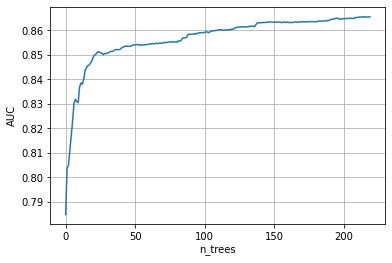

In [ ]:
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('n_trees')
plt.ylabel('AUC')
plt.grid()

In [ ]:
gbm_classes = (gbm_preds[:, 1] > 0.25)
print("precision: ", metrics.precision_score(ytest, gbm_classes))
print("recall: ", metrics.recall_score(ytest, gbm_classes))
print("accuracy: ", metrics.accuracy_score(ytest, gbm_classes))
print("auc-roc: ", metrics.roc_auc_score(ytest, gbm_preds[:, 1]))

precision:  0.53125
recall:  0.7259786476868327
accuracy:  0.7861896838602329
auc-roc:  0.8654965591323064


Градиентный бустинг даёт результат немного лучше, чем логистическая регрессия

In [ ]:
coef_table = pd.DataFrame({'features' : list(X.columns), 'importances' : list(gbm.get_feature_importance())})
coef_table.sort_values(by='importances')

,features,importances
4,hours-per-week,10.540760
1,educational-num,12.709748
3,capital-loss,13.124520
2,capital-gain,28.307374
0,age,35.317598


# Задание 2: добавление категориальных признаков в модель

In [ ]:
#Let's try to improve our LogisticRegression by adding categorial data

full_X = data_f.drop('income', axis = 1, inplace = False)
full_y = data_f['income']
full_Xtrain, full_Xtest, full_ytrain, full_ytest = train_test_split(full_X, full_y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), full_Xtrain.select_dtypes(include=['object']).columns),
    ('scaling', StandardScaler(), full_Xtrain.select_dtypes(include=[np.number]).columns)
])


full_Xtrain_transformed = column_transformer.fit_transform(full_Xtrain)
full_Xtest_transformed = column_transformer.transform(full_Xtest)

In [ ]:
full_Xtrain_transformed.shape

(6657, 101)

In [ ]:
full_Xtest_transformed.shape

(2220, 101)

In [ ]:
train_set = Pool(full_Xtrain_transformed, full_ytrain)
test_set = Pool(full_Xtest_transformed, full_ytest)
gbm = CatBoostClassifier(iterations=200,
                          depth=2,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(test_set)
gbm_classes = (gbm_preds[:, 1] > 0.3)
print("precision: ", metrics.precision_score(full_ytest, gbm_classes))
print("recall: ", metrics.recall_score(full_ytest, gbm_classes))
print("accuracy: ", metrics.accuracy_score(full_ytest, gbm_classes))
print("auc-roc: ", metrics.roc_auc_score(full_ytest, gbm_preds[:, 1]))

precision:  0.626193724420191
recall:  0.796875
accuracy:  0.8238738738738739
auc-roc:  0.9131817721005677


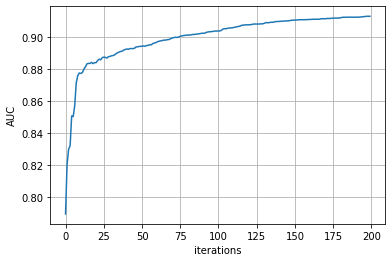

In [ ]:
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('iterations')
plt.ylabel('AUC')
plt.grid()

# Итоги. Результаты трех моделей

Первая логистическая регрессия:
* precision:  0.5150684931506849
* recall:  0.6690391459074733
* accuracy:  0.7753743760399334
* auc-roc:  0.8275262653544615

Градиентный бустинг:
* precision:  0.53125
* recall:  0.7259786476868327
* accuracy:  0.7861896838602329
* auc-roc:  0.8654965591323064

С категориальными признаками:
* precision:  0.626193724420191
* recall:  0.796875
* accuracy:  0.8238738738738739
* auc-roc:  0.9131817721005677